In [1]:
import json
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from random import randrange
from nltk.corpus import stopwords
import string
import spacy

## Tokenization and Stemming

In [2]:
ps = PorterStemmer()
with open('reviewSamples20.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Select random review and business_id
m = randrange(len(data))
business_id_1 = data[m]['business_id']
business_id_1

'GdCRQU3VCh_x8fY84mbwYQ'

In [5]:
preStem = []
for j in range(len(data)):
    if(data[j]['business_id'] == business_id_1):
        text = str(data[j]['text']).lower()
        word = word_tokenize(text)
        preStem.extend(word)

In [6]:
filtered_preStem = [w for w in preStem if not w in string.punctuation]
print(filtered_preStem)

['man', 'i', 'love', 'toronto', 'hiding', 'in', 'a', 'strip', 'mall', 'on', 'overlea', 'find', 'a', 'dingy', 'looking', 'restaurant', 'that', 'serves', 'up', 'fantastic', 'cheap', 'kabob', '...', 'be', 'warned', 'regardless', 'of', 'when', 'you', 'come', 'here', 'you', "'ll", 'likely', 'be', 'waiting', 'for', 'a', 'table', 'as', 'this', 'place', 'is', 'always', 'overrun', 'with', 'people', '...', 'if', 'you', "'re", 'a', 'fan', 'of', 'perfectly', 'grilled', 'spicy', 'meat', 'you', 'must', 'try', 'this', 'place', 'out', '...', 'now', 'that', 'i', "'ve", 'been', 'here', 'i', 'need', 'to', 'limit', 'how', 'many', 'times', 'i', 'go', 'here', 'per', 'month', 'take', 'the', 'drive', 'out', 'and', 'have', 'some', 'kabob', '...', 'if', 'you', 'do', "n't", 'own', 'a', 'car', 'borrow', 'one', 'or', 'get', 'a', 'zipcar', 'membership', '...', 'totally', 'worth', 'it']


In [7]:
# Stemming
stems = [ps.stem(w) for w in filtered_preStem]
print(stems)

['man', 'i', 'love', 'toronto', 'hide', 'in', 'a', 'strip', 'mall', 'on', 'overlea', 'find', 'a', 'dingi', 'look', 'restaur', 'that', 'serv', 'up', 'fantast', 'cheap', 'kabob', '...', 'be', 'warn', 'regardless', 'of', 'when', 'you', 'come', 'here', 'you', "'ll", 'like', 'be', 'wait', 'for', 'a', 'tabl', 'as', 'thi', 'place', 'is', 'alway', 'overrun', 'with', 'peopl', '...', 'if', 'you', "'re", 'a', 'fan', 'of', 'perfectli', 'grill', 'spici', 'meat', 'you', 'must', 'tri', 'thi', 'place', 'out', '...', 'now', 'that', 'i', "'ve", 'been', 'here', 'i', 'need', 'to', 'limit', 'how', 'mani', 'time', 'i', 'go', 'here', 'per', 'month', 'take', 'the', 'drive', 'out', 'and', 'have', 'some', 'kabob', '...', 'if', 'you', 'do', "n't", 'own', 'a', 'car', 'borrow', 'one', 'or', 'get', 'a', 'zipcar', 'membership', '...', 'total', 'worth', 'it']


In [8]:
freq_dist = FreqDist(filtered_preStem)
freq_dist = dict(freq_dist)
freq_dist = pd.Series(freq_dist)
freq_dist.sort_values(ascending=False, inplace=True)
freq_dist

a         6
...       5
you       5
i         4
here      3
         ..
likely    1
'll       1
come      1
when      1
it        1
Length: 84, dtype: int64

In [9]:
stemmed_freq_dist = FreqDist(stems)
stemmed_freq_dist = dict(stemmed_freq_dist)
stemmed_freq_dist = pd.Series(stemmed_freq_dist)
stemmed_freq_dist.sort_values(ascending=False, inplace=True)
stemmed_freq_dist

a       6
...     5
you     5
i       4
here    3
       ..
like    1
'll     1
come    1
when    1
it      1
Length: 84, dtype: int64

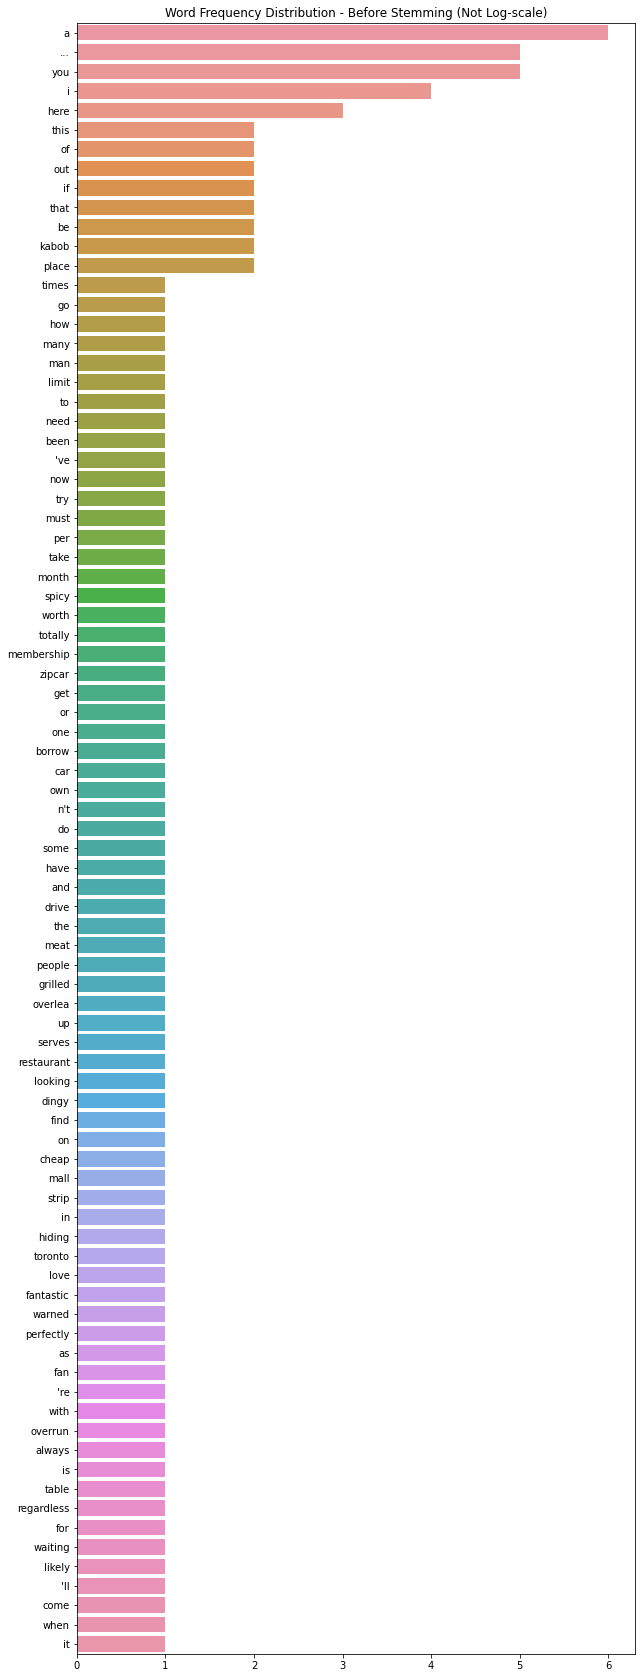

In [10]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=freq_dist.values, y=freq_dist.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()

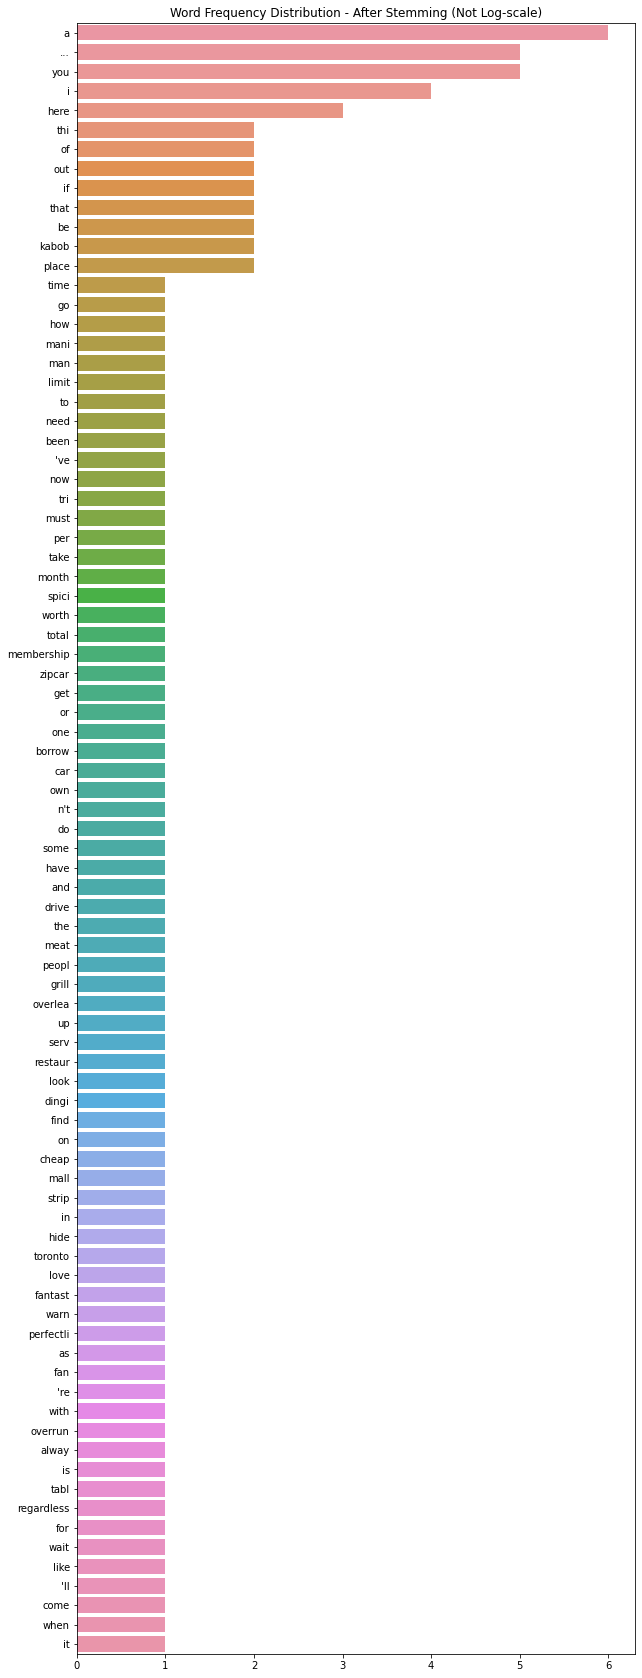

In [11]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=stemmed_freq_dist.values, y=stemmed_freq_dist.index, ax=ax)
plt.title("Word Frequency Distribution - After Stemming (Not Log-scale)")
plt.show()

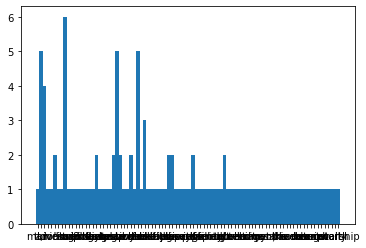

In [12]:
counts = Counter(preStem).items()
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

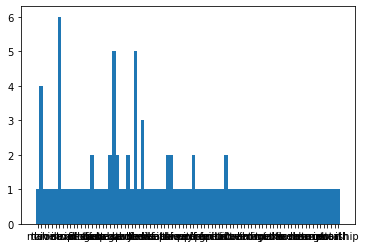

In [13]:
counts = Counter(stems).items()
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

In [14]:
# Select a second random business
i = randrange(len(data))
business_id_2 = data[i]['business_id']
business_id_2

'9nHpqlu7be1466wdo_t5kQ'

In [15]:
preStem_2 = []
for j in range(len(data)):
    if(data[j]['business_id'] == business_id_2):
        text = str(data[j]['text']).lower()
        words = word_tokenize(text)
        preStem_2.extend(words)

In [16]:
filtered_preStem_2 = [w for w in preStem_2 if not w in string.punctuation]
# Stemming
stems_2 = [ps.stem(w) for w in filtered_preStem_2]

In [18]:
freq_dist_2 = FreqDist(filtered_preStem_2)
freq_dist_2 = dict(freq_dist_2)
freq_dist_2 = pd.Series(freq_dist_2)
freq_dist_2.sort_values(ascending=False, inplace=True)
freq_dist_2

the           18
to            15
a             12
and            9
was            7
              ..
sticky         1
floor          1
dirty          1
great          1
experience     1
Length: 161, dtype: int64

In [19]:
stemmed_freq_dist_2 = FreqDist(stems_2)
stemmed_freq_dist_2 = dict(stemmed_freq_dist_2)
stemmed_freq_dist_2 = pd.Series(stemmed_freq_dist_2)
stemmed_freq_dist_2.sort_values(ascending=False, inplace=True)
stemmed_freq_dist_2

the       18
to        15
a         12
and        9
wa         7
          ..
kick       1
gross      1
sticki     1
floor      1
experi     1
Length: 159, dtype: int64

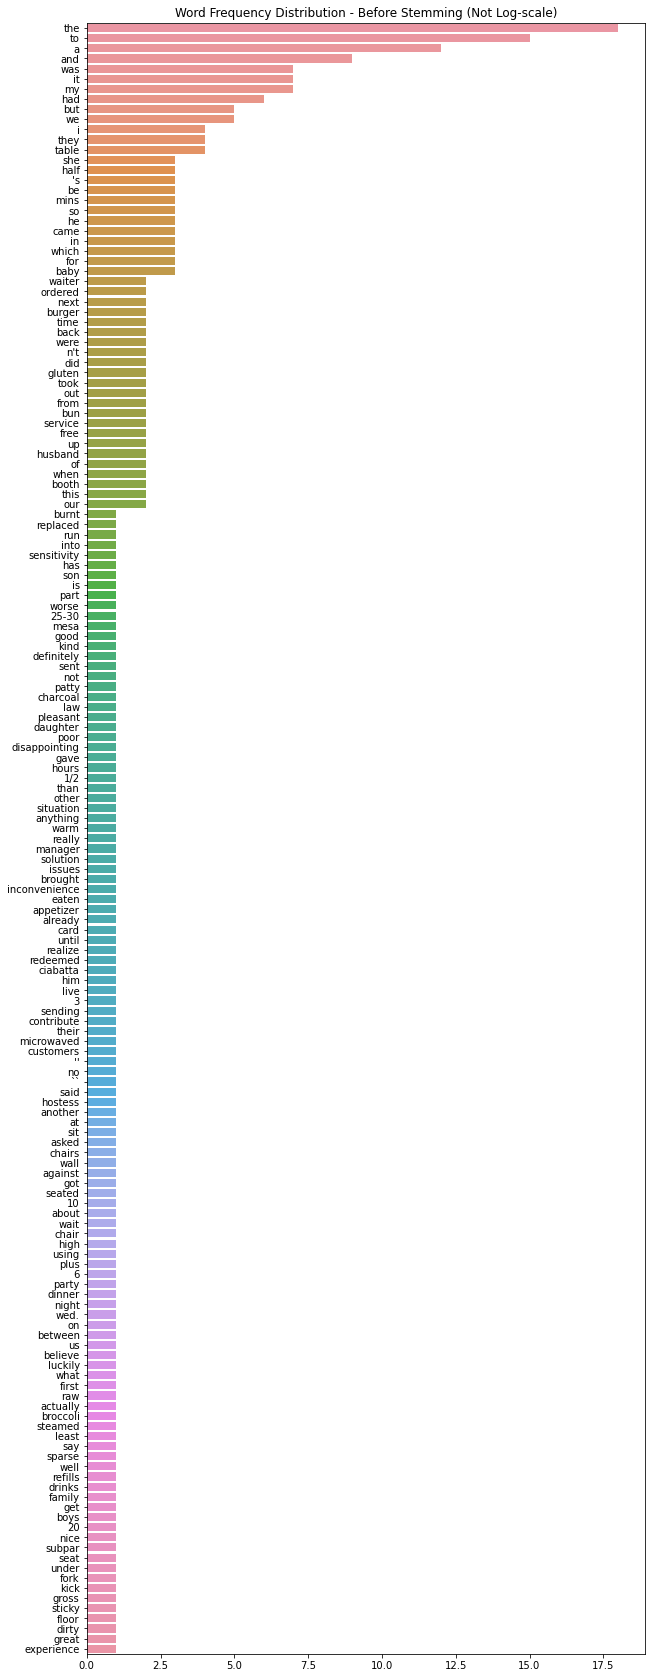

In [20]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=freq_dist_2.values, y=freq_dist_2.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()

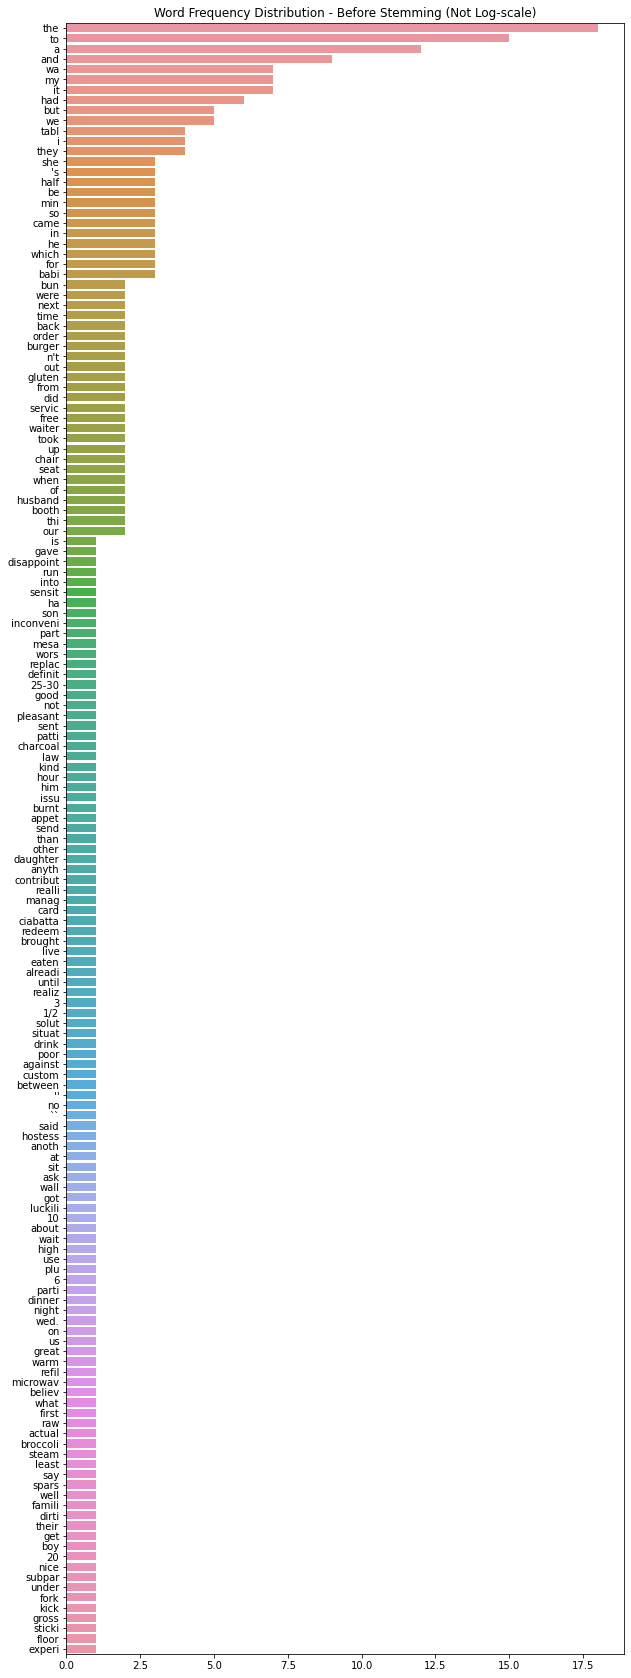

In [21]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=stemmed_freq_dist_2.values, y=stemmed_freq_dist_2.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()

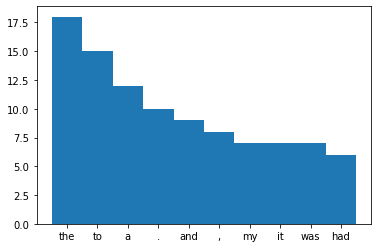

In [22]:
counts = Counter(preStem_2).most_common(10)
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

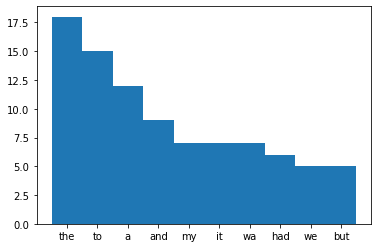

In [23]:
counts = Counter(stems_2).most_common(10)
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

Remove Stopwords - Ideally we want to remove stopwords before stemming

In [24]:
sw = stopwords.words('english')

In [25]:
# Business id 1
# Remove stop words
filtered_preStem = [w for w in filtered_preStem if not w in sw]
stems = [ps.stem(w) for w in filtered_preStem]

In [26]:
freq_dist = FreqDist(filtered_preStem).most_common(10)
freq_dist = dict(freq_dist)
freq_dist = pd.Series(freq_dist)
freq_dist.sort_values(ascending=False, inplace=True)

In [27]:
stemmed_freq_dist = FreqDist(stems).most_common(10)
stemmed_freq_dist = dict(stemmed_freq_dist)
stemmed_freq_dist = pd.Series(stemmed_freq_dist)
stemmed_freq_dist.sort_values(ascending=False, inplace=True)

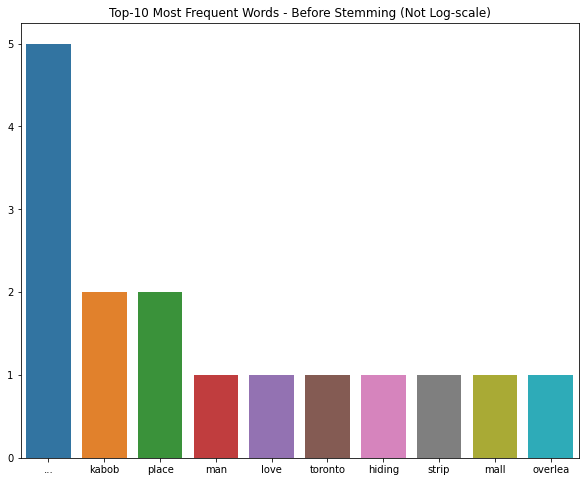

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=freq_dist.index, y=freq_dist.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

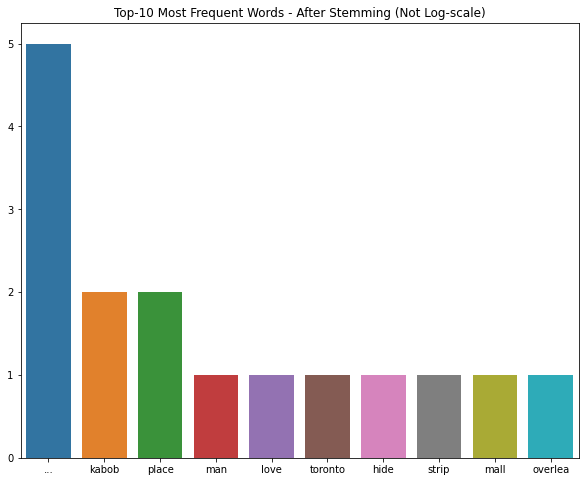

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=stemmed_freq_dist.index, y=stemmed_freq_dist.values, ax=ax)
plt.title("Top-10 Most Frequent Words - After Stemming (Not Log-scale)")
plt.show()

In [30]:
# Repeat for business id 2
# Remove stop words
filtered_preStem_2 = [w for w in filtered_preStem_2 if not w in sw]
stems_2 = [ps.stem(w) for w in filtered_preStem_2]

In [31]:
freq_dist_2 = FreqDist(filtered_preStem_2).most_common(10)
freq_dist_2 = dict(freq_dist_2)
freq_dist_2 = pd.Series(freq_dist_2)
freq_dist_2.sort_values(ascending=False, inplace=True)

In [32]:
stemmed_freq_dist_2 = FreqDist(stems_2).most_common(10)
stemmed_freq_dist_2 = dict(stemmed_freq_dist_2)
stemmed_freq_dist_2 = pd.Series(stemmed_freq_dist_2)
stemmed_freq_dist_2.sort_values(ascending=False, inplace=True)

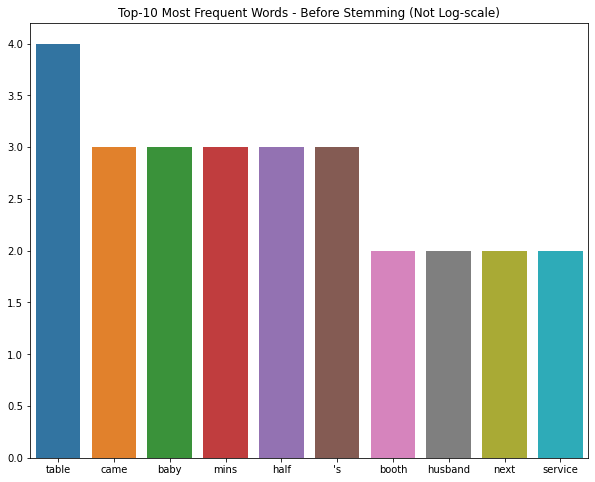

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=freq_dist_2.index, y=freq_dist_2.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

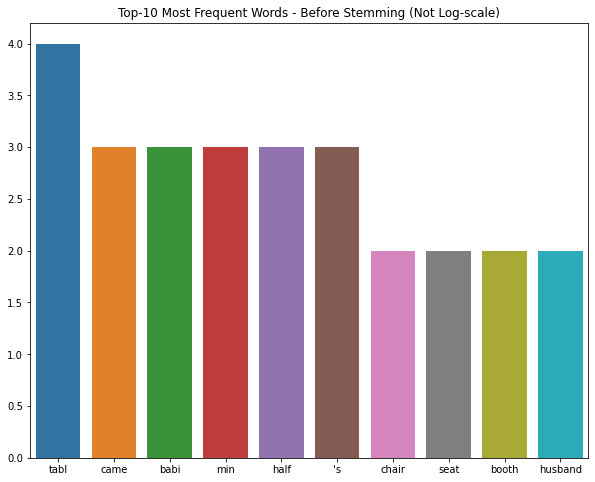

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=stemmed_freq_dist_2.index, y=stemmed_freq_dist_2.values, ax=ax)
plt.title("Top-10 Most Frequent Words - Before Stemming (Not Log-scale)")
plt.show()

## POS Tagging

In [35]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amade\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
sentences = []
for review in data:
    dummy_list = nltk.tokenize.sent_tokenize(review['text'])
    sentences.extend(dummy_list)
print(sentences)

["I'll be the first to admit that I was not excited about going to La Tavolta.", 'Being a food snob, when a group of friends suggested we go for dinner I looked online at the menu and to me there was nothing special and it seemed overpriced.', 'Im also not big on ordering pasta when I go out.', 'Alas, I was outnumbered.', 'Thank goodness!', 'I ordered the sea bass special.', 'It was to die for.', 'Cooked perfectly, seasoned perfectly, perfect portion.', 'I can not say enough good things about this dish.', 'When the server asked how it was he seemed very proud of the dish and said, " doesn\'t she (the chef) do an incredible job?"', 'She does.', 'My hubby got the crab tortellini and also loved his.', 'I heard "mmmm this is so good" from all around the table.', 'Our waiter was super nice and even gave us free desserts because we were some of the last people in the restaurant.', "Service was very slow and the place was PACKED but we had our jugs of wine and a large group with good conversa

In [37]:
nlp = spacy.load("en_core_web_sm")

In [38]:
patterns = [
...     (r'.*ing$', 'VBG'),                # gerunds
...     (r'.*ed$', 'VBD'),                 # simple past
...     (r'.*es$', 'VBZ'),                 # 3rd singular present
...     (r'.*ould$', 'MD'),                # modals
...     (r'.*\'s$', 'NN$'),                # possessive nouns
...     (r'.*s$', 'NNS'),                  # plural nouns
...     (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
...     (r'.*', 'NN')                      # nouns (default)
... ]

In [39]:
import random
regexp_tagger = nltk.RegexpTagger(patterns)
for i in range(5):
    # Pick a random sentence
    sentence = random.choice(sentences)
    
    # Tokenise chosen sentence
    word_tokens = word_tokenize(sentence)
    
    # NLTK pos tagger
    sample_POS = nltk.pos_tag(word_tokens)
    # REGEXP tagging
    regrex_output = regexp_tagger.tag(word_tokens)
    
    # SPACY POS tagging
    spacy_tags = []
    for word in word_tokens:
        spacy_tags.append(nlp(word)[0].tag_)
    
    # Print output
    print("Sentence " + str(i+1) + ": ")
    print(f"{'Word':{15}} {'NLTK POS Tag':{15}} {'REGREX POS TAG':{15}} {'spaCy POS TAG':{15}}")
    for i in range(len(word_tokens)):
        print(f'{word_tokens[i]:{15}} {sample_POS[i][1]:{15}} {regrex_output[i][1]:{15}} {spacy_tags[i]:{15}}')
    print()

Sentence 1: 
Word            NLTK POS Tag    REGREX POS TAG  spaCy POS TAG  
I               PRP             NN              PRP            
bet             VBP             NN              VB             
at              IN              NN              IN             
this            DT              NNS             DT             
point           NN              NN              NN             
in              IN              NN              IN             
time            NN              NN              NN             
you             PRP             NN              PRP            
are             VBP             NN              VBP            
wondering       VBG             VBG             VBG            
why             WRB             NN              WRB            
I               PRP             NN              PRP            
am              VBP             NN              VBP            
only            RB              NN              RB             
giving          VBG        

## Writing Style

In [69]:
# returns (number of non capitalised proper nouns, total number of proper nouns)
def checkProperNounCapitalised(text, nlp):
    count = 0
    not_capitalised = 0
    doc = nlp(text)
    for token in doc:
        if token.pos_ == "PROPN":
            count += 1
            if not token.text[0].isupper():
                not_capitalised += 1
    return (not_capitalised, count)

In [75]:
def checkFirstWordCapitalised(text):
    count = 0
    sentences = nltk.tokenize.sent_tokenize(text)
    for sentence in sentences:
        if not sentence[0].isupper():
            count += 1
    return (count, len(sentences))

## Most frequent ⟨ Noun - Adjective ⟩ pairs for each rating

In [41]:
with open('reviewSelected100.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

In [46]:
unique_businesses = set()
for review in data:
    unique_businesses.add(review['business_id'])
print("Number of businesses: " + str(len(unique_businesses)))

Number of businesses: 153


In [47]:
# TBC: might use inverted index
def extractUniqueReviews(rating, amount, data, unique_businesses):
    count = 0
    business_set = set()
    while (count < amount):
        pass

In [54]:
def getNounAdjectivePairs(review_text, nlp):
    results = []
    sentences = nltk.tokenize.sent_tokenize(review_text)
    for sentence in sentences:
        doc = nlp(sentence)
        for i, token in enumerate(doc):
            if token.pos_ == 'NOUN' or token.pos_ == 'PROPN':
                for j in range(len(doc)):
                    if doc[j].pos_ == 'ADJ':
                        results.append((token, doc[j]))
    return results
    
s = 'Mark and John are sincere employees at Google. The food is very nice and delicious'
print(getNounAdjectivePairs(s, nlp))

[(Mark, sincere), (John, sincere), (employees, sincere), (Google, sincere), (food, nice), (food, delicious)]
